In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
len(data.columns)

12

In [5]:
X=data.iloc[:,[8,10,11]].values

In [6]:
X

array([[ 3.51,  9.4 ,  5.  ],
       [ 3.2 ,  9.8 ,  5.  ],
       [ 3.26,  9.8 ,  5.  ],
       ...,
       [ 3.42, 11.  ,  6.  ],
       [ 3.57, 10.2 ,  5.  ],
       [ 3.39, 11.  ,  6.  ]])

In [7]:
from sklearn.cluster import KMeans

In [8]:
elbow=[]

In [9]:
for i in range(1,10):
    sd=KMeans(n_clusters=i)
    sd.fit(X)
    elbow.append(sd.inertia_)

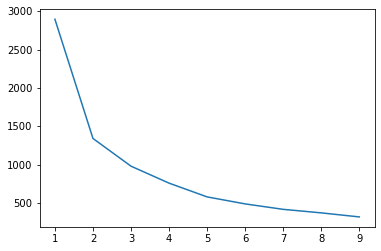

In [10]:
plt.plot(range(1,10),elbow)

In [11]:
hello=KMeans(n_clusters=5)
hello.fit(X)

KMeans(n_clusters=5)

In [12]:
hello.cluster_centers_

array([[ 3.28242623,  9.69562842,  6.09508197],
       [ 3.34189189, 12.37417417,  6.51801802],
       [ 3.37816327, 10.83086735,  4.83163265],
       [ 3.28606679,  9.54424861,  4.9257885 ],
       [ 3.3178635 , 10.96414441,  6.24332344]])

In [13]:
pred=hello.predict(X)

In [14]:
pred

array([3, 3, 3, ..., 4, 2, 4])

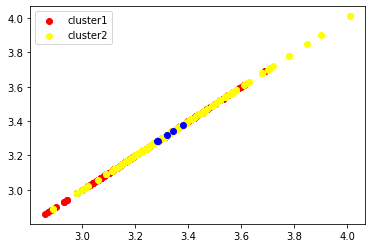

In [19]:
plt.scatter(X[pred==0,0],X[pred==0,0],c="red",label="cluster1")
plt.scatter(X[pred==1,0],X[pred==1,0],c="yellow",label="cluster2")
plt.scatter(hello.cluster_centers_[:,0],hello.cluster_centers_[:,0],c="blue")
plt.legend()    

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [39]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [40]:
X=data[['fixed acidity','residual sugar','free sulfur dioxide','density','pH']]
y=data['quality']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [42]:
lr=LogisticRegression()

In [43]:
lr.fit(X_train,y_train)

C:\Users\radha\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\radha\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [44]:
plor=lr.predict(X_test)

In [45]:
plor

array([5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5,

In [46]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,plor)

0.40625

In [48]:
lr=LogisticRegression()

In [49]:
rfc=RandomForestClassifier()

In [50]:
dtc=DecisionTreeClassifier()

In [51]:
sv=SVC()

In [52]:
lr.fit(X,y)

C:\Users\radha\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\radha\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
rfc.fit(X,y)

C:\Users\radha\Anaconda3\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
sv.fit(X,y)

C:\Users\radha\Anaconda3\New folder\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
plr=lr.predict(X)
plr

array([6, 5, 5, ..., 5, 5, 5], dtype=int64)

In [57]:
prfc=rfc.predict(X)

In [59]:
psv=sv.predict(X)

In [61]:
accuracy_score(y,plr)

0.4527829893683552

In [62]:
accuracy_score(y,prfc)

0.975609756097561

In [66]:
accuracy_score(y,psv)

0.5609756097560976